In [1]:
from openbb_terminal.sdk import openbb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytimetk as tk

import matplotlib.pyplot as plt
plt.rcdefaults()

In [2]:
SYMBOL = "SPY"
START = "2021-12-01"
END = "2023-12-01"

# Load the data
data = openbb.stocks.load(SYMBOL, start_date=START, end_date=END)

df = data.reset_index()[['date', 'Close']]

df.columns = ['date', 'Price']

df .plot_timeseries(
        date_column="date",
        value_column="Price",
        title="SPY Close",
        x_lab="Date",
        y_lab="Price",
    )



Loading Daily data for SPY with starting period 2021-12-01.

In [3]:
# STEP 2: Apply FFT

# Convert to time series
stock_data = df.set_index('date')

# Apply FFT
fft_result = np.fft.fft(stock_data['Price'])
frequencies = np.fft.fftfreq(len(fft_result), d=1)  # Assuming daily data, d=1

# Compute magnitude and corresponding periods
magnitude = np.abs(fft_result)
periods = 1 / frequencies

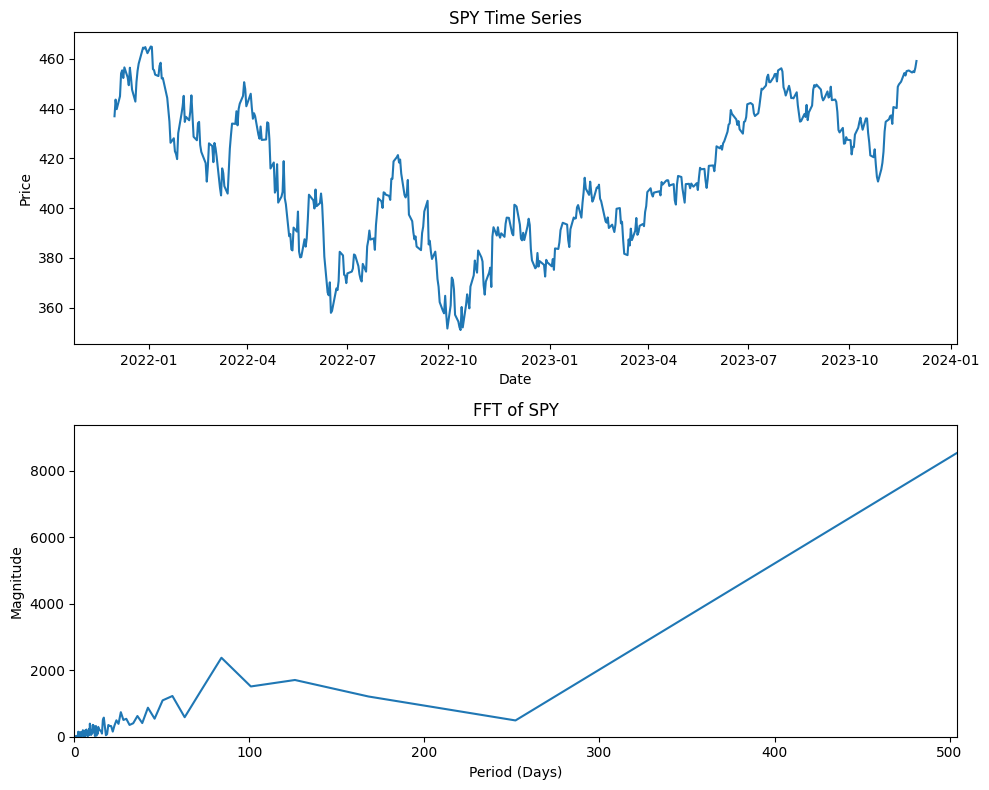

In [4]:
# Plotting
plt.figure(figsize=(10, 8))  # Adjusted for vertical stacking

# Original Time Series Data
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(stock_data.index, stock_data['Price'])
plt.title(f'{SYMBOL} Time Series')
plt.xlabel('Date')
plt.ylabel('Price')

# Frequency Domain Representation
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(periods, magnitude)
plt.title(f'FFT of {SYMBOL}')
plt.xlabel('Period (Days)')
plt.ylabel('Magnitude')
plt.xlim(0, max(periods[1:]))  # Limiting x-axis to view significant periods (ignore large periods)
plt.ylim(0, max(magnitude[1:]) * 1.1)  # Ignore the zero frequency component

plt.tight_layout()
plt.show()

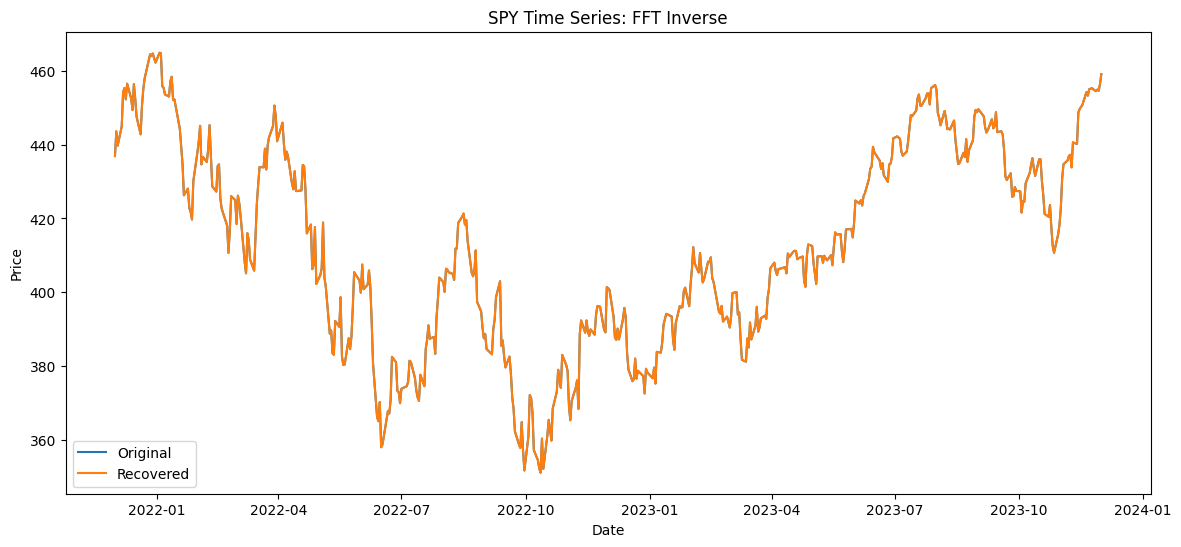

In [5]:
# STEP 3: Recover the original time series

# Recovering the original time series
recovered = np.fft.ifft(fft_result)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(stock_data.index, stock_data['Price'], label='Original')
plt.plot(stock_data.index, recovered, label='Recovered')
plt.title(f'{SYMBOL} Time Series: FFT Inverse')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

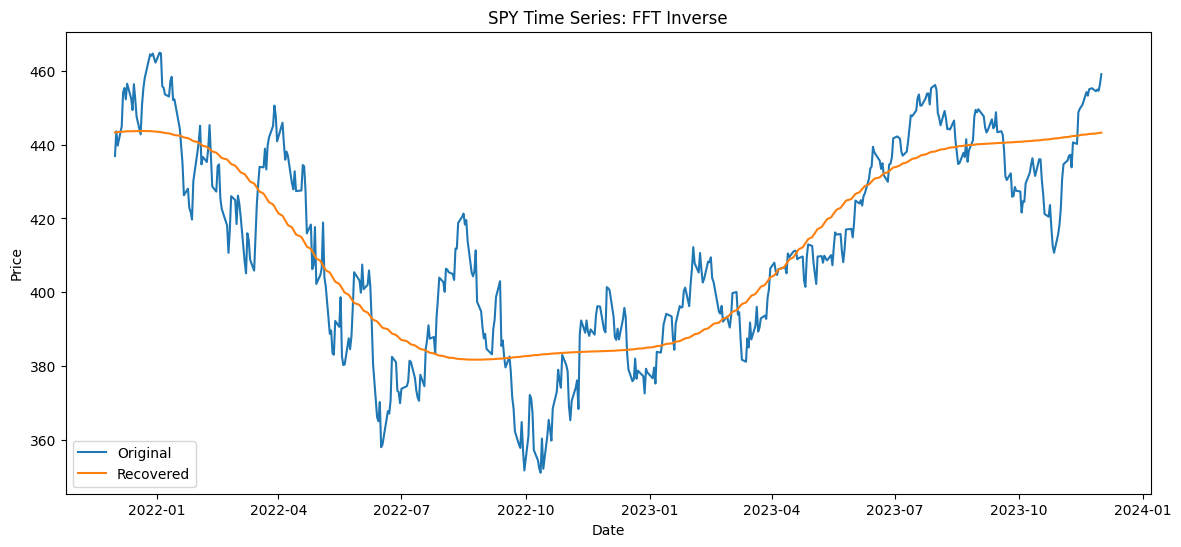

In [6]:
# STEP 4: Recover the original time series with just the top 25 dominant periods

# Displaying a few dominant periods
dominant_periods = pd.Series(periods, index=magnitude).nlargest(25)
dominant_periods.to_frame('Period (Days)')

# Recovering the original time series with just the top 5 dominant periods
top_periods = dominant_periods.index
top_fft_result = fft_result.copy()
top_fft_result[np.abs(frequencies) > 1 / top_periods.min()] = 0
top_recovered = np.fft.ifft(top_fft_result)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(stock_data.index, stock_data['Price'], label='Original')
plt.plot(stock_data.index, top_recovered, label='Recovered')
plt.title(f'{SYMBOL} Time Series: FFT Inverse')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()